### TODO 
* import UML image
* separate and clean up cells

In [14]:
from math import pi
from math import sqrt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle as Rect
from matplotlib.patches import Circle as Circ

# --------------------------------- MAIN CLASS GEOMETRY ----------------------

class Geometry:
    """Geometry shape with x and y"""
    def __init__(self, x: float, y:float) -> None: #x: x coordinate, y: y coordinate
        self.x = x
        self.y = y

    @property
    def x(self)-> float:
        """Read-only property"""
        return self._x
    
    @property
    def y(self) -> float:
        """Read-only property"""
        return self._y

    @x.setter
    def x(self, value: float) -> None:
        """Setter for x, validation check"""
        self._x = Geometry.validation_check(value)

    @y.setter
    def y(self, value: float) -> None:
        """Setter for y, validation check"""
        self._y = Geometry.validation_check(value)

    @staticmethod
    def validation_check(value: float) -> float:
        """Validation for integer or float """
        if not isinstance(value, (int,float)):
            raise TypeError (f"Only integer or float allowed, {type(value)} is invalid.")
        return value

    @staticmethod
    def eu_dis(x1:float, x2:float, y1:float, y2:float) -> float:
        """Euclidean distance between two points"""
        x1 = Geometry.validation_check(x1)
        y1 = Geometry.validation_check(y1)
        x2 = Geometry.validation_check(x2)
        y2 = Geometry.validation_check(y2)
        return sqrt((x2-x1)**2+(y2-y1)**2)

    @staticmethod
    def distance(p1:float, p2:float) -> float:
        """Return the horizontal or vertical distance of two points of X, or two points of Y."""
        p1 = Geometry.validation_check(p1)
        p2 = Geometry.validation_check(p2)
        return abs(p1-p2)


    def __eq__(self, other) -> bool:
        """Return if two shapes are equal"""
        pass
    
    def move(self, deltaX:float, deltaY:float):
        """Moves the Geometric shape"""
        self._x += Geometry.validation_check(deltaX)
        self._y += Geometry.validation_check(deltaY)


    def __repr__(self) -> str:
        """Present instance"""
        return f"Geometric shape X and Y: ({self.x}, {self.y})."



# -------------- SUB-CLASS RECTANGLE ------------------

class Rectangle(Geometry):
    def __init__(self, x: float, y: float, side1: float, side2: float) -> None: 
        """Rectangle with (x, y) midpoint, side1=horizontal lenght, side2=vertical lenght."""
        super().__init__(x,y)
        self.side1 = side1
        self.side2 = side2
    
    @property
    def side1(self) -> float:
        """Read-only property"""
        return self._side1

    @property
    def side2(self) -> float:
        """Read-only property"""
        return self._side2
    
    @side1.setter
    def side1(self, value: float) -> None:
        """Setter for side1, validation check"""
        self._side1 = Geometry.validation_check(value)
    
    @side2.setter
    def side2(self, value: float) -> None:
        """Setter for side2, validation check"""
        self._side2 = Geometry.validation_check(value)
    
    def area(self) -> float:
        """Area of rectangle"""
        return self.side1*self.side2
    
    def perimeter(self) -> float:
        """Perimeter of rectangle"""
        return 2*(self.side1+self.side2)
    
    def is_inside(self, x_point:float, y_point:float) -> bool:
        """Check if a point is inside the rectangle"""
        return Geometry.distance(self.x, x_point) <= 0.5*self.side1 and Geometry.distance(self.y, y_point) <= 0.5*self.side2
    
    def __eq__(self, other) -> bool:
        """Check if two rectangles are equal"""
        return type(self) == type(self) and self.area() == other.area() and self.perimeter()==other.perimeter()  and (self.side1 == other.side1 or self.side1 == other.side2)

    def __repr__(self) -> str:
        """Present instance"""
        return f"Rectangle with center point: ({self.x}, {self.y})- (Horizontal side, vertical side): ({self.side1}, {self.side2})." 

# -------------- RECTANGLE PLOT --------------------

    def plot_rectangle(self,x_point=None, y_point=None) -> None:
        """Draw rectangle and a point"""
        fig, ax = plt.subplots(dpi=100,figsize=(10,4))

        # Draw point. if statement so if there is input for the point it will draw it. Otherwise it will draw just the rectangle.
        if x_point !=None and y_point !=None:
            ax.plot(x_point,y_point, color='red', marker='*')


        # draw rectangle, referance: https://www.pythonpool.com/matplotlib-draw-rectangle/
        ax.add_patch(Rect((self.x-0.5*self.side1, self.y-0.5*self.side2), self.side1, self.side2, color="b", fill=False, linewidth = 2))

        # Fix Rectangle, adjust the figsize aspect ratio to not stretch the rectangle.
        # https://stackoverflow.com/questions/52340318/correcting-aspect-ratio-of-circle-plot-with-matplotlib-patches
        ax.set_aspect("equal")

        # draw midpoint and grid
        ax.plot(self.x, self.y,"s", color ="b")
        ax.grid()

        # Legend : custom legend, with placement outside the plot. 
        # https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
        # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
        Shape = mpatches.Patch(color='blue', label='Geometric Shape')
        pointtocheck = mpatches.Patch(color='red', label='Point')

        plt.legend(handles=[Shape, pointtocheck], prop={'size': 8}, loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=5)


        # create title and plot show
        ax.set(title="Rectangle and Midpoint")
        plt.show()



#-------------------- SUB-CLASS CIRCLE -----------------------

class Circle(Geometry):
    def __init__(self, x: float, y: float, radius: float) -> None:
        """Circle with (x, y)midpoint and radius"""
        super().__init__(x,y)
        self.radius = radius
    
    @property
    def radius(self) -> float:
        """Read-only property"""
        return self._radius
    
    @radius.setter
    def radius(self, value: float) -> None:
        """Setter for radius, validation check"""
        self._radius = Geometry.validation_check(value)
    
    def area(self) -> float:
        """Area of circle"""
        return float(pi*(self.radius**2))
    
    def perimeter(self) -> float:
        """Perimeter of circle"""
        return 2*pi*self.radius

    def is_inside(self,x_point:float, y_point:float) -> bool:
        """Check if a point is in circle"""
        mid_to_point = Geometry.eu_dis(self.x, x_point, self.y, y_point)
        return mid_to_point <= self.radius

    def __eq__(self, other) -> bool:
        """Check if two circles are equal."""
        return type(self) == type(other) and self.radius == other.radius

    def __repr__(self) -> str:
        """Present instance"""
        return f"Circle with center point: ({self.x}, {self.y}), Radius: {self.radius}" 

# ------------------------ CIRCLE PLOT ----------------------

    def plot_circle(self,x_point=None, y_point=None) -> None:
        """Draw circle and a point"""
        # Draw fig
        fig, ax = plt.subplots(dpi=100,figsize=(10,4))

        # Draw point. if statement so if there is input for the point it will draw it. Otherwise it will draw just the circle.
        if x_point !=None and y_point !=None:
            ax.plot(x_point,y_point, color='red', marker='*')
        
        # Draw circle
        test = ax.add_patch(Circ((self.x, self.y), self.radius, color="b", fill=False, clip_on=False))

        # Fix Circle, adjust the figsize aspect ratio to not stretch the circle.
        # https://stackoverflow.com/questions/52340318/correcting-aspect-ratio-of-circle-plot-with-matplotlib-patches
        ax.set_aspect("equal")

        # draw midpoint and grid
        test2 = ax.plot(self.x, self.y,"s", color ="b")
        ax.grid()

        # create title and plot show
        ax.set(title="Circle with Midpoint")

        
        # Legend : custom legend, with placement outside the plot. 
        # https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
        # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
        Shape = mpatches.Patch(color='blue', label='Geometric Shape')
        pointtocheck = mpatches.Patch(color='red', label='Point')

        plt.legend(handles=[Shape, pointtocheck], prop={'size': 8}, loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=5)


        plt.show()

True
False
True
False


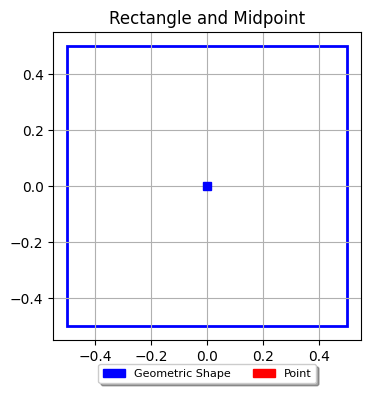

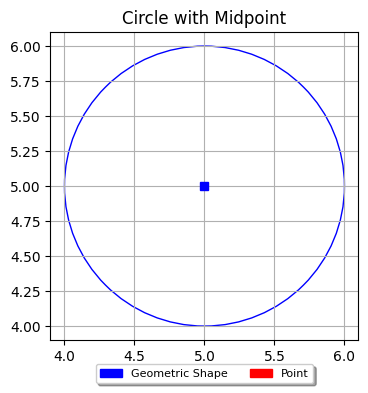

In [15]:
# ---------------- RUNNING THE CODE ------------------------

cirkel1 = Circle(x=0,y=0, radius=1) # enhetscirkel
cirkel2 = Circle(x=1,y=1, radius=1)
rektangel = Rectangle(x=0,y=0,side1=1, side2=1)

print(cirkel1==cirkel2) # True
print(cirkel2==rektangel) # False
print(cirkel1.is_inside(0.5, 0.5)) # True
cirkel1.move(5,5)
print(cirkel1.is_inside(0.5, 0.5)) # False
#cirkel1.move("TRE",5) # ge ValueError med lämplig kommentar
rektangel.plot_rectangle()
cirkel1.plot_circle()

Whether (0.5, 0.5) is in cirkel1: True.


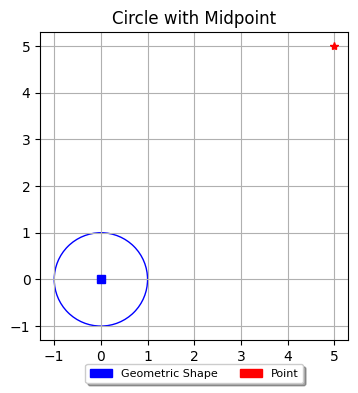

Whether (0.5, 0.5) is in rektangel: True


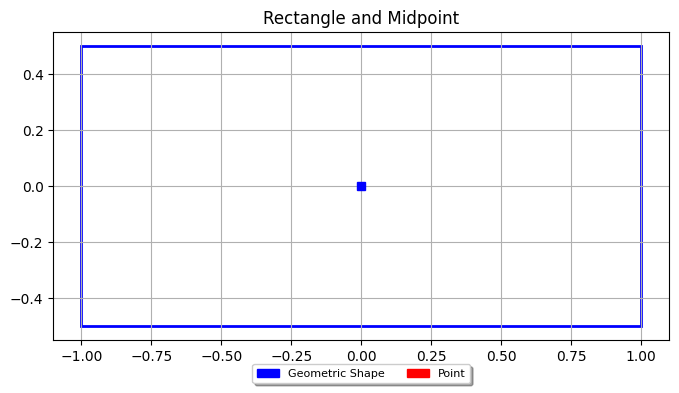

In [16]:
cirkel1 = Circle(x=0,y=0, radius=1) # enhetscirkel

print(f"Whether (0.5, 0.5) is in cirkel1: {cirkel1.is_inside(0.5, 0.5)}.")
cirkel1.plot_circle(5, 5)

rektangel = Rectangle(x=0,y=0,side1=2, side2=1)
print(f"Whether (0.5, 0.5) is in rektangel: {rektangel.is_inside(0.5, 0.5)}") # True
rektangel.plot_rectangle()


Rectangle with center point: (0, 0)- (Horizontal side, vertical side): (1, 1).
The area of rektangel is: 1
The perimeter of rektangel is: 4
Whether cirkel2 is equal to rektangel:False
Whether rektangel2 is equal to rektangel3: True
Whether (0.5, 0.5) is in rektangel: True


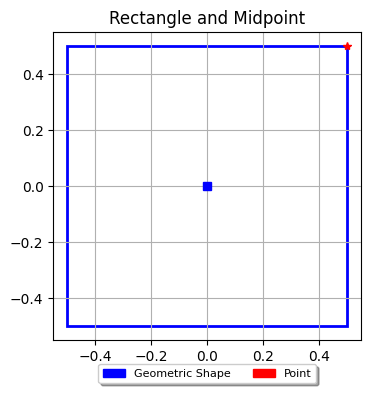

Whether (1, 0.5) is in rektangel: False


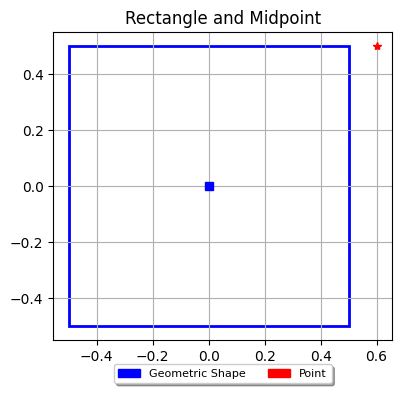

In [17]:
try:
    rektangel = Rectangle(0,0,0, 1)
except ValueError as err:
    print(err)
    
rektangel = Rectangle(x=0,y=0,side1=1, side2=1)
print(rektangel)

print(f"The area of rektangel is: {rektangel.area()}")
print(f"The perimeter of rektangel is: {rektangel.perimeter()}")

print(f"Whether cirkel2 is equal to rektangel:{cirkel2==rektangel}") # False

rektangel2 = Rectangle(x=0,y=0,side1=2, side2=1)
rektangel3 = Rectangle(x=0,y=0,side1=1, side2=2)
print(f"Whether rektangel2 is equal to rektangel3: {rektangel2 == rektangel3}")

print(f"Whether (0.5, 0.5) is in rektangel: {rektangel.is_inside(0.5, 0.5)}") # True
rektangel.plot_rectangle(0.5,0.5)

print(f"Whether (1, 0.5) is in rektangel: {rektangel.is_inside(1, 0.5)}") # False
rektangel.plot_rectangle(0.6,0.5)